In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fredapi as fa

# from local_settings import fred as settings

In [3]:
fred = fa.Fred(api_key='80bb4946bd82b4678687f7c3d426d13c')
gdp = fred.get_series('GDP')
gdp.name = 'gdp'
gdp.tail()

2020-10-01    21477.597
2021-01-01    22038.226
2021-04-01    22740.959
2021-07-01    23202.344
2021-10-01    23992.355
Name: gdp, dtype: float64

In [14]:
df = pd.DataFrame(gdp)
df['lngdp'] = np.log(df['gdp'])
df['diff'] =  df['lngdp'] - df['lngdp'].shift(1) 
df.head(10)

,gdp,lngdp,diff
1946-01-01,NaN,NaN,NaN
1946-04-01,NaN,NaN,NaN
1946-07-01,NaN,NaN,NaN
1946-10-01,NaN,NaN,NaN
1947-01-01,243.164,5.493736,NaN
1947-04-01,245.968,5.505201,0.011465
1947-07-01,249.585,5.519800,0.014598
1947-10-01,259.745,5.559700,0.039901
1948-01-01,265.742,5.582526,0.022826
1948-04-01,272.567,5.607884,0.025359


In [16]:
df.index = pd.to_datetime(df.index)
df

,gdp,lngdp,diff
1946-01-01,NaN,NaN,NaN
1946-04-01,NaN,NaN,NaN
1946-07-01,NaN,NaN,NaN
1946-10-01,NaN,NaN,NaN
1947-01-01,243.164,5.493736,NaN
...,...,...,...
2020-10-01,21477.597,9.974766,0.015911
2021-01-01,22038.226,10.000534,0.025768
2021-04-01,22740.959,10.031923,0.031389
2021-07-01,23202.344,10.052009,0.020086


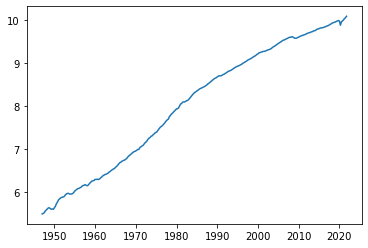

In [37]:
plt.plot(df.index, df['lngdp'])

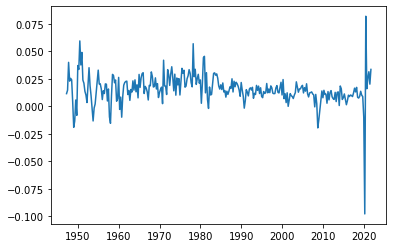

In [19]:
plt.plot(df.index, df['diff'])

In [38]:
diff = df['diff'][6:]
diff_2 = diff[:-5]
lgdp = df['lngdp'][6:]

In [39]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(lgdp)
print('h0: Random Walk')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


h0: Random Walk
ADF Statistic: -2.003063
p-value: 0.285232
	1%: -3.453
	5%: -2.871
	10%: -2.572


In [40]:
result

(-2.003063007113835,
 0.28523169437424456,
 2,
 295,
 {'1%': -3.452713099849546,
  '5%': -2.871387839457783,
  '10%': -2.5720171933352485},
 -1675.831425655436)

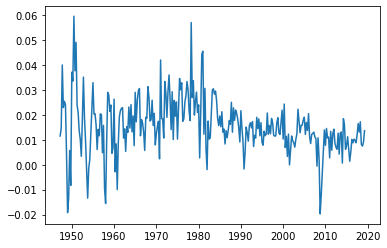

In [35]:
df_2 = df[:-10]
plt.plot(df_2.index, df_2['diff'])